In [11]:
# Importing all the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Load data into a pandas DataFrames

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

train_df.info()
test_df.info()
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# View the first five rows of the train dataset
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
"""
QUESTION 1: Explore Data Distribution

Produce summary statistics, visualizations, and interpretive text describing the distributions of 
SalePrice(int), TotRmsAbvGrd(int), and OverallCond(int).
"""

# Generate summary statistics using describe () function for full data set

summary_stats_train = train_df.describe()

# Display the summary statistics

print(summary_stats_train)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [6]:
"""
QUESTION 1: Explore Data Distribution

Produce summary statistics, visualizations, and interpretive text describing the distributions of 
SalePrice(int), TotRmsAbvGrd(int), and OverallCond(int).
"""

# Generate summary statistics using describe () function for SalePrice, TotRmsAbvGrd, and OverallCond

selected_columns = ['SalePrice', 'TotRmsAbvGrd','OverallCond']

summary_selected_columns = train_df[selected_columns].describe()

# Display the summary statistics

print(summary_selected_columns)

           SalePrice  TotRmsAbvGrd  OverallCond
count    1460.000000   1460.000000  1460.000000
mean   180921.195890      6.517808     5.575342
std     79442.502883      1.625393     1.112799
min     34900.000000      2.000000     1.000000
25%    129975.000000      5.000000     5.000000
50%    163000.000000      6.000000     5.000000
75%    214000.000000      7.000000     6.000000
max    755000.000000     14.000000     9.000000



Sale Price:
Most properties are concentrated between the lower price ranges, i.e., the $100,000 to $200,000 price range, with the outliers showing significantly higher priced homes. The distribution is skewed to the right.

Total Rooms Above Grade:
Majority of the homes have 6-7 rooms above grade, with a relatively normal distribution.


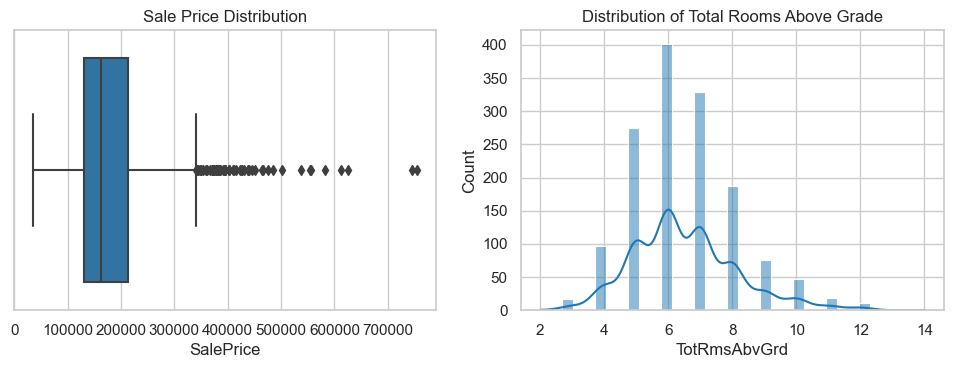

In [27]:
# Visualizations, and interpretive text describing the distributions of 
   #SalePrice, TotRmsAbvGrd

# Sale Price boxplot to show outliers    
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x='SalePrice', data =train_df)
plt.title('Sale Price Distribution')

# Total Rooms Above Grade Histogram
plt.subplot(2,2,2)
sns.histplot(train_df['TotRmsAbvGrd'], kde=True)
plt.title('Distribution of Total Rooms Above Grade')

# Interpretive Text 

print("\nSale Price:")
print("Most properties are concentrated between the lower price ranges, i.e., the $100,000 to $200,000 price range, with the outliers showing significantly higher priced homes. The distribution is skewed to the right.")

print("\nTotal Rooms Above Grade:")
print("Majority of the homes have 6-7 rooms above grade, with a relatively normal distribution.")


In [15]:
# Visualizations, and interpretive text describing the distributions of Overall Condition

# Define the mapping of 'OverallCond' numeric values to categorical labels

label_mapping = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Fair',
    4: 'Below Average',
    5: 'Average',
    6: 'Above Average',
    7: 'Good',
    8: 'Very Good',
    9: 'Excellent',
    10: 'Very Excellent'
}

# Create a new column 'OverallCond_Ratings' with categorical labels
train_df['OveralCond_Ratings']=train_df['OverallCond'].map(label_mapping)

#Display the modified DataFrame with the new categorical column

train_df.head(5)

# View 'OverallCond' and 'OveralCond_Ratings' columns at index position 18 and 82 respectively

desired_data = train_df.iloc[:,[18,81]]
print(desired_data)

      OverallCond OveralCond_Ratings
0               5            Average
1               8          Very Good
2               5            Average
3               5            Average
4               5            Average
...           ...                ...
1455            5            Average
1456            6      Above Average
1457            9          Excellent
1458            6      Above Average
1459            6      Above Average

[1460 rows x 2 columns]


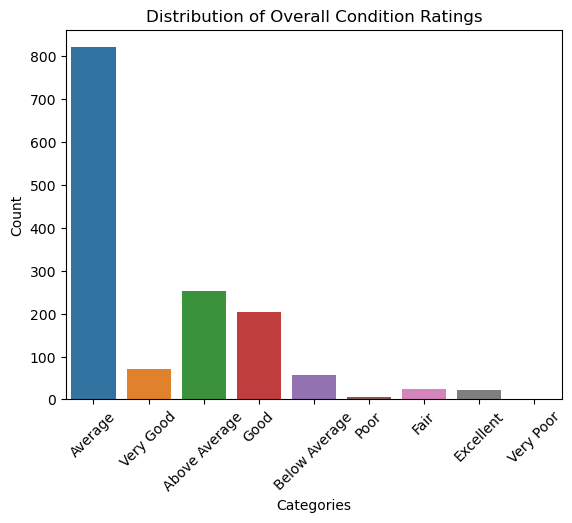

In [16]:
# Distribution of the Overall Condition Rating Categories - Bar graph

# Displaying a count plot for the specific categorical column, Overall Condition Ratings
sns.countplot(x='OveralCond_Ratings', data=train_df, )
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Overall Condition Ratings')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Interpretive Text 

print("\nOverall Condition:")
print("Most homes have an average rating of 5 ")



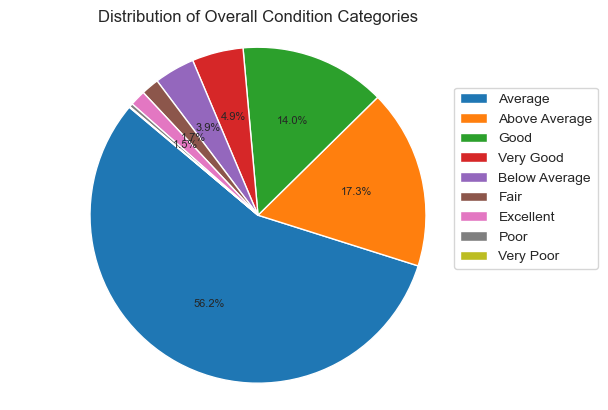


Overall Condition:
Most of the houses, i.e., 56.2% of the houses have an average rating of 5 


In [28]:
# Distribution of the Overall Condition Rating Categories - Pie Chart

category_counts = train_df['OveralCond_Ratings'].value_counts()

# Plotting the pie chart

#plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',labeldistance=1.1, textprops={'fontsize':8})
pie=plt.pie(category_counts, autopct=lambda pct:f'{pct:.1f}%' if pct >1.5 else '', startangle=140, textprops={'fontsize':8})
plt.axis('equal')
plt.title('Distribution of Overall Condition Categories', fontsize=12)

# Adjusting label font size for the legend

plt.legend(pie[0], category_counts.index, bbox_to_anchor=(1.2,0.6), loc="center right", fontsize=10)

# Adding Seaborn style
sns.set_context("notebook")
sns.set_style("whitegrid")

plt.show()

# Interpretive Text 

print("\nOverall Condition:")
print("Most of the houses, i.e., 56.2% of the houses have an average rating of 5 ")

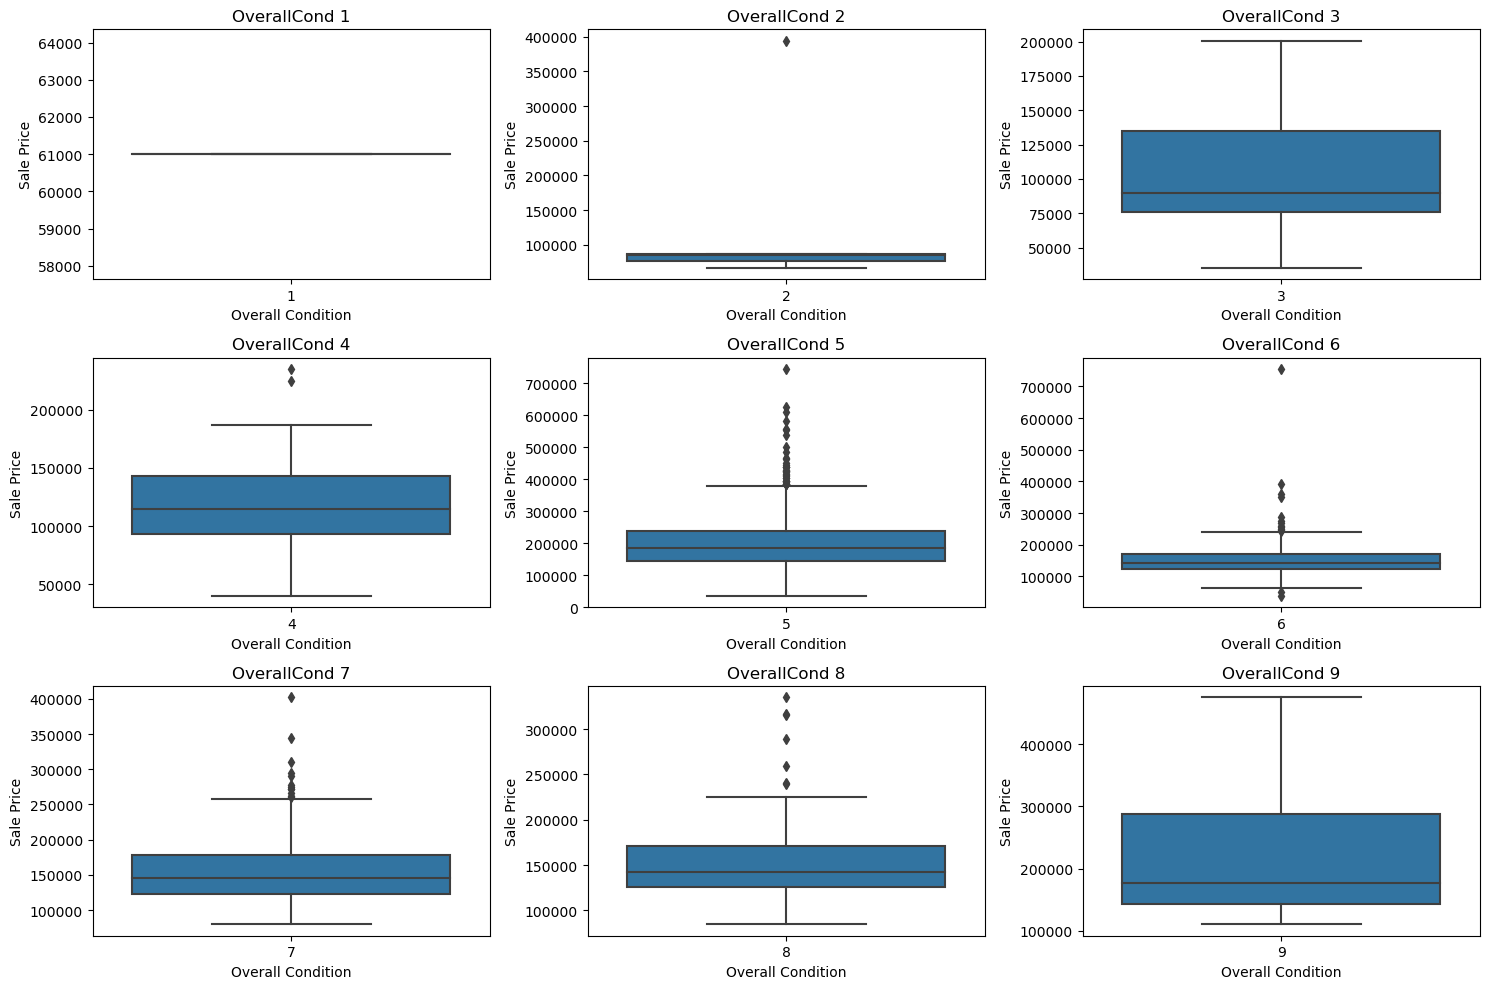

In [17]:
"""
QUESTION 2: Explore Differences between Subsets

Separate the data into subsets based on OverallCond, then demonstrate how this split 
impacts the distribution of SalePrice.
"""

# Grouping the data by 'OverallCond'
grouped_data = train_df.groupby('OverallCond')

# Create a figure and axes (subplots) for boxplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Adjust the number of rows and columns as per your data

# Plotting boxplots for each category within 'OverallCond'
for (name, group), ax in zip(grouped_data, axes.flatten()):
    sns.boxplot(x='OverallCond', y='SalePrice', data=group, ax=ax)
    ax.set_title(f'OverallCond {name}')
    ax.set_xlabel('Overall Condition')
    ax.set_ylabel('Sale Price')
    ax.grid(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [22]:
"""
QUESTION 3: Explore Correlations

Find the features that have the strongest positive and negative correlations with SalePrice, and produce plots 
representing these relationships.
"""

correlations = numeric_columns.corr()['SalePrice'].sort_values()
correlations

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

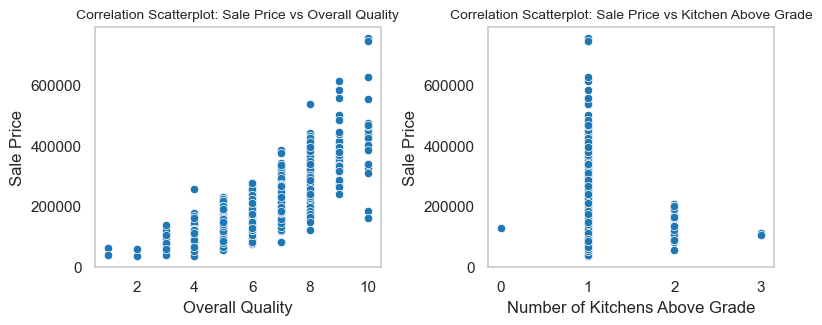


Strongest Positive Correlation:
The regression line shows the overall relationship between the property's age and the Sale price. From the trend line we see that the newer properties are priced significantly higher, and the sale price decreases with older the properties.

Strongest Negative Correlation:
The number of kitchens above grade and sale price have the strongest negative correlation. There is no correlation between the number of kitches above grade and the sale price.


In [32]:
"""
QUESTION 3: Explore Correlations

Find the features that have the strongest positive and negative correlations with SalePrice, and produce plots 
representing these relationships.
"""

# Plotting the scatterplot with strongest positive correlation with Sale Proce
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.scatterplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Correlation Scatterplot: Sale Price vs Overall Quality', fontsize=10)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.grid(False)

# Plotting the scatterplot with strongest negative correlation with Sale Price
#plt.figure(figsize=(8,6))
plt.subplot(2,2,2)
sns.scatterplot(x='KitchenAbvGr', y='SalePrice', data=train_df)
plt.title('Correlation Scatterplot: Sale Price vs Kitchen Above Grade', fontsize=10)
plt.xlabel('Number of Kitchens Above Grade')
plt.ylabel('Sale Price')
plt.grid(False)

plt.subplots_adjust(wspace=5, hspace=1)

plt.tight_layout()
plt.show()

#Interpretive Text

print("\nStrongest Positive Correlation:")
print("The regression line shows the overall relationship between the property's age and the Sale price. From the trend line we see that the newer properties are priced significantly higher, and the sale price decreases with older the properties.")

print("\nStrongest Negative Correlation:")
print("The number of kitchens above grade and sale price have the strongest negative correlation. There is no correlation between the number of kitches above grade and the sale price.")


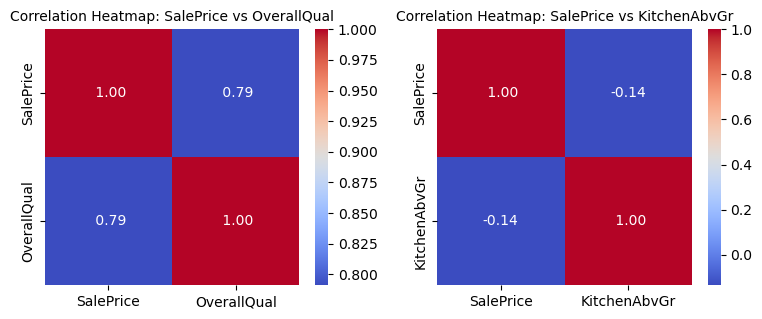

In [21]:
# Selecting SalePrice and OverallQuall columns
data_subset_positive = train_df[['SalePrice', 'OverallQual']]
data_subset_negative = train_df[['SalePrice', 'KitchenAbvGr']]

# Calculate the correlation matrix
correlation_matrix_positive = data_subset_positive.corr()
correlation_matrix_negative = data_subset_negative.corr()

# Plotting the heatmap with strongest positive correlation
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.heatmap(correlation_matrix_positive, annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Heatmap: SalePrice vs OverallQual', fontsize=10)

# Plotting the heatmap with strongest negative correlation
#plt.figure(figsize=(8,6))
plt.subplot(2,2,2)
sns.heatmap(correlation_matrix_negative, annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Heatmap: SalePrice vs KitchenAbvGr', fontsize=10)

plt.subplots_adjust(wspace=5, hspace=1)

plt.tight_layout()
plt.show()

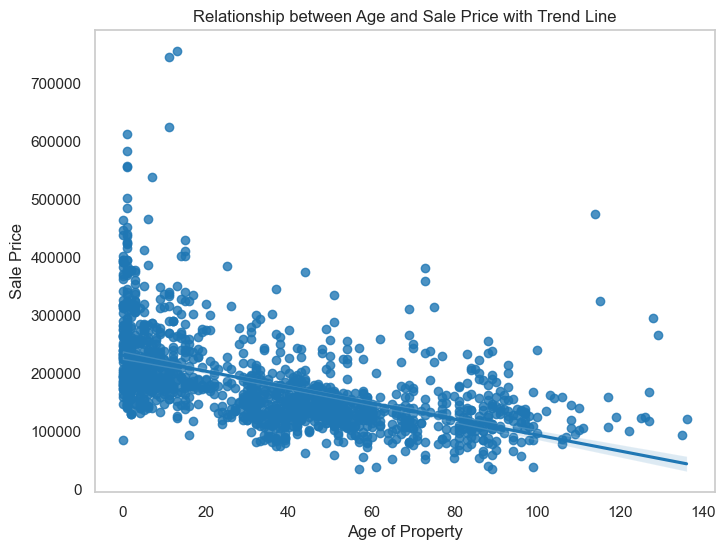


Relationship between Age and Sale Price:
The regression line shows the overall relationship between the property's age and the Sale price. From the trend line we see that the newer properties are priced significantly higher, and the sale price decreases with older the properties


In [29]:
"""
QUESTION 4: Engineer and Explore a New Feature

Create a new feature Age, which represents the difference between the year sold and the year built, 
and plot the relationship between the age and sale price.
"""

# Create a new column 'Age'
train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']

# Scatter plot showing the relationship between Property Age and Sale Price with a trend line
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='SalePrice', data=train_df)
plt.title('Relationship between Age and Sale Price with Trend Line')
plt.xlabel('Age of Property')
plt.ylabel('Sale Price')
plt.grid(False)
plt.show()

# Interpretive Text 

print("\nRelationship between Age and Sale Price:")
print("The regression line shows the overall relationship between the property's age and the Sale price. From the trend line we see that the newer properties are priced significantly higher, and the sale price decreases with older the properties")